# Bulldozers SalePrice prediction using Machine Learning

In this project we are going to determine the saleprice prediction of the bulldozers, we have imported the dataset through the kaggle 

## Problem statement

The main aim of this project is to determine the saleprice prediction given the data, as we are predicting the price of the bulldozers so in this data we have to perform regression and the other thing we have to do is to compute the root mean squared log error (RMSLE)

There are 3 datasets:

Train.csv - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
Valid.csv - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

So, Let's start the project

## Importing the libraries

In [64]:
#importing the models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading and Reading the data

In [2]:
#loading the data

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid/TrainAndValid.csv")
df.head()

C:\Users\ajaya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis(EDA)

In [3]:
#Transposing the data to view all the columns and repective data
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df_tmp = df.copy()

In [6]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

<AxesSubplot:>

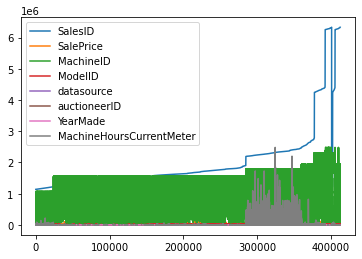

In [8]:
df_tmp.plot()

In [9]:
df_tmp.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

## Preprocessing and Filling the missing Data

In [10]:
# parsing the saledate column using parse_date because 
# when we work with time series data we have to enrich the time and date column as much as possible
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid/TrainAndValid.csv", 
                      low_memory=False,
                      parse_dates= ["saledate"])
df_tmp["saledate"].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [11]:
# sort the saledate column because its actually good to sort the date column
# for time series problems

df_tmp.sort_values(by=["saledate"], inplace=True, ascending=True)
df_tmp['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [12]:
# Add datetime parameters for saledate
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear

# Drop original saledate
df_tmp.drop("saledate", axis=1, inplace=True)

In [13]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [14]:
# lets check whether one column is string or not we do this by pandas api of string

pd.api.types.is_string_dtype(df["UsageBand"])

True

In [15]:
# lets check all the columns by looping 
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


These are the columns whose dtype is string, Now we have to change the string value into category values

In [16]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [17]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [18]:
# what are the numerical values of these categories
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [19]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [20]:
# Now lets fill the missing values we have and we will fill the missing values from median of all the numbers
# lets check the missing values first
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [21]:
# Now lets fill the missing data...
# At first lets fill the numerical missing data
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear


These are the numeric columns in the whole dataframe

In [22]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


We have numerical missing values in these columns

In [23]:
#lets fill these missing values with the median

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # adding a column which tells us if the data was missing or not
            df_tmp[label + "_is_missing"] = pd.isnull(content)
            #filling the missing value
            df_tmp[label] = content.fillna(content.median())

In [24]:
#Now lets check again for the numerical missing values...
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

As you can see there are no missing values as all missing values has been filled by median of that whole rows respectively

In [25]:
#Now lets fill the missing values of categorical columns

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [26]:
# checking no. of missing values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [27]:
pd.Categorical(df_tmp["UsageBand"]).codes
# As there are missing values, that values will be inbuilt assigned negative values i.e. -1
#so we have to make it positive by adding 1

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [28]:
# Now, lets fill these missing values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        #filling the missing values 
        df_tmp [label] = pd.Categorical(content).codes + 1 # adding 1 to make the missing values positive

In [29]:
# Now lets check again for the missing values in the whole dataframe
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

So, Now we can see in here that all the missing values in the dataframe are filled,
so now its the time to train this model and evaluate it

In [30]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [31]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


Now, all our data is numeric , so lets fit the model and evaluate it

In [32]:
len(df_tmp)

412698

## Modelling 

In [33]:
%%time
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_jobs=-1, random_state=42)

reg.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

Wall time: 18min 46s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [34]:
# Now lets test our model
reg.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875468079970562

We have performed training and testing only on the training and validation data and not on the test data ,our model gave a good accuracy only on the data it has seen how about we give it another set of data and lets see how it processes

One thing to note is from the data description of this dataset we have seen that the training data are the data which are having the years upto 2012 and the validation data is from the year jan 2012 to April 2012 as shown below :-

The data for this competition is split into three parts:

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

So, lets split our model into training and validation split and then train on it...


## Splitting data into training and validation set

In [35]:
df_tmp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [36]:
# lets checjk the value counts of the saleyear

df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [37]:
#now lets split

Train_data = df_tmp[df_tmp.saleYear == 2012]
Valid_data = df_tmp[df_tmp.saleYear != 2012]

#Lets check the length of both
len(Train_data), len(Valid_data)

(11573, 401125)

In [38]:
#splitting into training and testing data(i.e X and y)

X_train, y_train = Train_data.drop("SalePrice", axis=1), Train_data.SalePrice
X_valid, y_valid = Valid_data.drop("SalePrice",axis=1), Valid_data.SalePrice

#checking the lengths of all training and valid data 
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((11573, 102), (11573,), (401125, 102), (401125,))

Data is equally splitted and is perfect and now its time for evaluation of our model

## Evaluation of the model

In [39]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def Root_mean_squared_log_error(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def scores(reg):
    train_preds = reg.predict(X_train)
    valid_preds = reg.predict(X_valid)
    score = {"train_mean_absolute_error": mean_absolute_error(y_train, train_preds),
             "valid_mean_absolute_error": mean_absolute_error(y_valid, valid_preds),
             "train_root_mean_squared_log_error": Root_mean_squared_log_error(y_train, train_preds),
             "valid_root_mean_squared_log_error": Root_mean_squared_log_error(y_valid, valid_preds),
             "train_r2_score": reg.score(X_train, y_train),
             "valid_r2_score": reg.score(X_valid, y_valid)}
    return score

Lets tune our model and set max_samples parameter to 10000 as we have seen earlier that our model is taking much time while training all the data from our model so setting max_samples to 10000 the model take any of the 10000 random samples and trains on it...

In [40]:
#instantiating the model
reg = RandomForestRegressor(n_jobs=-1, max_samples=10000, random_state=42) 

In [41]:
%%time 
#lets fit the model
reg.fit(X_train, y_train)

Wall time: 20 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [42]:
scores(reg)

{'train_mean_absolute_error': 2250.9771969238745,
 'valid_mean_absolute_error': 8780.756186485509,
 'train_root_mean_squared_log_error': 0.1062154553464161,
 'valid_root_mean_squared_log_error': 0.3881439885770194,
 'train_r2_score': 0.9815754677222476,
 'valid_r2_score': 0.651419823409717}

So this evaluation task is finished now lets hypertune our model using RandomizedSearchCV

## Hyperparameter tuning using RandomizedSearchCV

In [43]:
from sklearn.model_selection import RandomizedSearchCV

rs_cv = {"n_estimators": np.arange(10, 100, 10),
         "max_depth": [None, 3, 5, 10],
         "min_samples_split": np.arange(2, 20, 2),
         "min_samples_leaf": np.arange(1, 20, 2),
         "max_features": [0.5, 1, "sqrt", "auto"],
         "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rs_cv, 
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 9258 but got value 10000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ajaya\anaconda3\lib

C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 9258 but got value 10000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 9258 but got value 10000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 9258 but got value 10000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 9258 but got value 10000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 9258 but got value 10000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 9258 but got value 10000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 9258 but got value 10000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 9258 but got value 10000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 103, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 9258 but got value 10000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ajaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [44]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 18,
 'min_samples_leaf': 15,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [45]:
# lets again check the scores by calling the scores function which we created above
scores(rs_model)

{'train_mean_absolute_error': 5700.292267709899,
 'valid_mean_absolute_error': 8987.38865358392,
 'train_root_mean_squared_log_error': 0.24317336111589632,
 'valid_root_mean_squared_log_error': 0.39525248765149634,
 'train_r2_score': 0.8903652697409694,
 'valid_r2_score': 0.6355800027165327}

## Train a model with the best parameters

In a model I prepared earlier, I tried 100 different combinations of hyperparameters (setting n_iter to 100 in RandomizedSearchCV) and found the best results came from the ones you see below.

Note: This kind of search on my computer (n_iter = 100) took ~2-hours. So it's kind of a set and come back later experiment.

We'll instantiate a new model with these discovered hyperparameters and reset the max_samples back to its original value.

In [46]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

Wall time: 4.99 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [47]:
scores(ideal_model)

{'train_mean_absolute_error': 3821.613306340974,
 'valid_mean_absolute_error': 8786.329738293807,
 'train_root_mean_squared_log_error': 0.16686691851921237,
 'valid_root_mean_squared_log_error': 0.3875730736420187,
 'train_r2_score': 0.9512328547882244,
 'valid_r2_score': 0.6545781713204568}

So this above parts was all about training and validation data now lets do our original step that is testing our model on the test data and check their results about how our model is performing on the data which it has not seen earlier

In [48]:
# importing the test data

df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


test data is only consisting of 52 rows and many columns are in string format and some data is also missing if we train the data in this manner it will throw an error defintely 

so lets check and confirm the above statement

In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

It signifies that some of the data are in object and some are in int so we have to transform them into numbers so our model can recognise the patterns

In [50]:
# lets check the missing data
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [51]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [52]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [53]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
405675,4449186,2318824,26964,173,99.0,1996,0.0,0,2269,711,...,True,True,True,True,True,False,False,False,True,True
401133,1222855,531393,23926,121,3.0,1000,8145.0,2,85,19,...,True,True,True,True,True,True,True,True,True,True
406076,6258613,1810917,13260,149,99.0,2000,24.0,2,1115,328,...,True,True,True,True,True,True,True,True,True,True
409018,6282680,1543404,1830,149,99.0,2004,4373.0,3,64,20,...,False,False,False,False,False,True,True,True,True,True
409026,6282759,1863077,11390,149,99.0,2006,3467.0,3,139,41,...,False,False,False,False,False,True,True,True,True,True


In [54]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

ValueError: Number of features of the model must match the input. Model n_features is 102 and input n_features is 101 

We've found an error and it's because our test dataset (after preprocessing) has 101 columns where as, our training dataset (X_train) has 102 columns (after preprocessing).

Let's find the difference.

In [55]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In this case, it's because the test dataset wasn't missing any auctioneerID fields.

To fix it, we'll add a column to the test dataset called auctioneerID_is_missing and fill it with False, since none of the auctioneerID fields are missing in the test dataset.

In [56]:
# Match test dataset columns to training dataset
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [57]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

When looking at the Kaggle submission requirements, we see that if we wanted to make a submission, the data is required to be in a certain format. Namely, a DataFrame containing the SalesID and the predicted SalePrice of the bulldozer.

Let's make it.

In [58]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,19979.867703
1,1227844,22653.310722
2,1227847,43277.531657
3,1227848,55178.876637
4,1227863,49046.527799
...,...,...
12452,6643171,40989.707783
12453,6643173,17114.816174
12454,6643184,16295.774301
12455,6643186,18030.303751


In [59]:
# Export to csv...
df_preds.to_csv("data/bluebook-for-bulldozers/predictions.csv", index=False)

## Feature importance

So, we have made our predictions , now let us know which feature contributed the most to the outcome of our predictions.This process is actually known as feature importance

To find which features were most important of a machine learning model, a good idea is to search something like "[MODEL NAME] feature importance".

In [60]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([1.79365714e-02, 2.46233173e-02, 4.44261785e-02, 3.82330576e-04,
       2.58167963e-03, 1.67146992e-01, 4.15339016e-03, 1.02188244e-03,
       5.47721060e-02, 5.26722622e-02, 7.68015301e-02, 4.39203072e-03,
       1.57293336e-02, 1.81456781e-01, 7.99278913e-02, 6.44584921e-03,
       4.27419849e-03, 3.10877171e-03, 1.96388387e-03, 4.61490822e-02,
       5.95124360e-04, 7.03385103e-05, 3.74016203e-03, 9.60039552e-05,
       1.67542334e-03, 8.09459099e-04, 3.02214877e-03, 4.24030220e-03,
       2.49724382e-03, 2.95235550e-03, 1.22479613e-02, 3.12427885e-03,
       2.29746555e-03, 3.43123140e-03, 1.88523216e-03, 3.94878740e-03,
       1.22454633e-03, 2.86242756e-02, 1.78836834e-03, 5.43277072e-03,
       1.87348768e-03, 6.98271330e-04, 1.81082958e-03, 4.53454412e-04,
       1.01621769e-03, 6.88574535e-04, 3.98112695e-04, 3.01270357e-03,
       1.82945467e-03, 6.52820960e-04, 6.04633281e-04, 0.00000000e+00,
       1.66625356e-03, 6.12107296e-03, 2.50461058e-03, 7.37310856e-03,
      

Since we are not getting that much information through these let us plot the bar graph of this data through seaborn

In [61]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

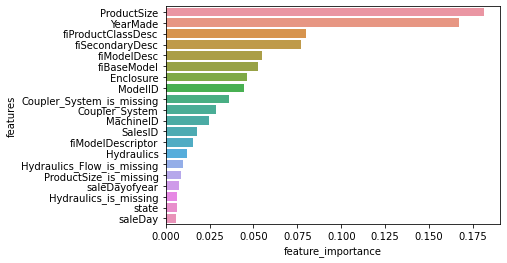

In [62]:
plot_features(X_train.columns, ideal_model.feature_importances_)

Through this we can observe that 'ProductSize'feature contributed the most to get our outcome

In [63]:
sum(ideal_model.feature_importances_)

1.0

## Conclusion

So we have completed our project based on prediction of bulldozers price, Lets sum up what we have done:-

From the data obtained from kaggle we have seen from the exploratory data analysis most of the data is actually in object datatype and most of the data was missing, so we have preprocessed the data and filled the missing values with median of the data and after preprocessing, we have also made our metrics such as mean absolute error , mean squared error, root mean squared log error and tested our model and we have obtained a root mean sqaured log error(RMSLE) of about 0.38, we have also seen the feature importance that is which feature contributed the most for the prediction of our target variable i.e the sales price and we have seen that the feature 'ProductSize' contributed the most to predict our target variable